### Panel data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Panel 1

In [2]:
data = np.loadtxt('data/Paneles/Pulses_multi_P1_Th530.dat')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 52866


In [3]:
hist_total = np.sum(data, axis=0)
chs = np.linspace(0, 63, num=64)

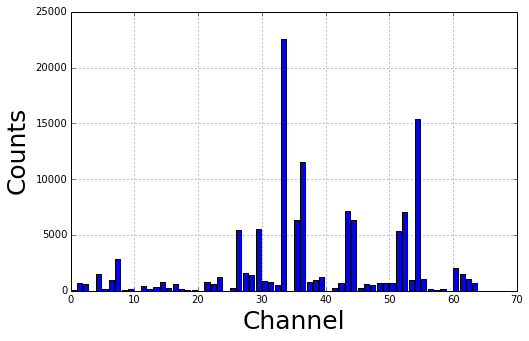

In [5]:
fig = plt.figure(figsize=(8, 5))
plt.bar(chs, hist_total)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.grid()

In [6]:
nBars = 30
matrix = np.zeros((nBars,nBars))
sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

for k in range (N):
    
    columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
    rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

    if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical
        
            for i in range(nBars):
                for j in range(nBars):
                    matrix[i,j]= matrix[i,j] + rows[i]*columns[j]
                    


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


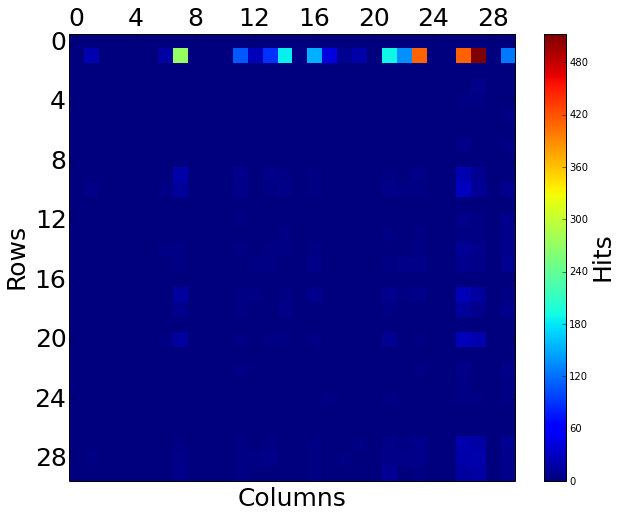

In [7]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(matrix, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

### Panel 2

In [20]:
data = np.loadtxt('data/Paneles/Pulses_multi_P2_Th450.dat')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 40197


In [9]:
nBars = 30
matrix = np.zeros((nBars,nBars))
sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

for k in range (N):
    
    columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
    rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

    if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical
        
            for i in range(nBars):
                for j in range(nBars):
                    matrix[i,j]= matrix[i,j] + rows[i]*columns[j]

matrix = np.fliplr(matrix)  # Matrix reordering

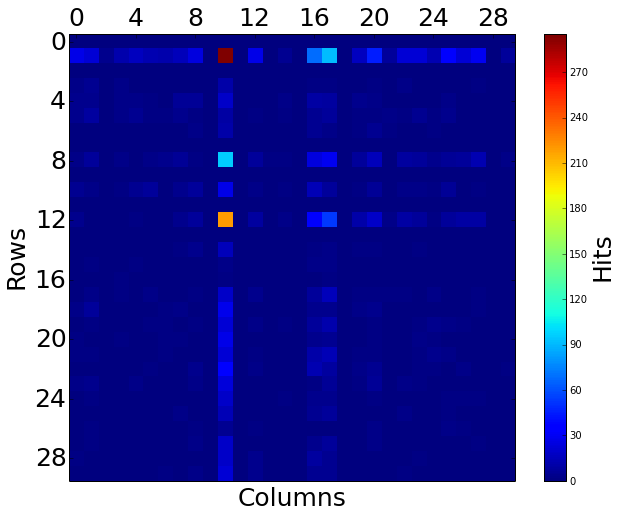

In [10]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(matrix, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

### Diagonal calculation and attenuation ratio

In [11]:
diag = np.diagonal(matrix)

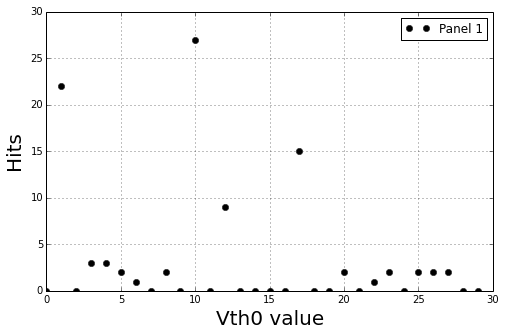

In [13]:
fig = plt.figure(figsize=(8, 5))
plt.plot(diag, 'ok')
plt.xlabel("Vth0 value", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

### Curve fitting

In [14]:
Pos = np.linspace(0,29,30)

param = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  Pos,  diag,  p0=(14, 1e-2))
A = param[0][0]
B = param[0][1]

Pos_fit = np.linspace(0,29,101)

Atten = A*np.exp(-B*Pos_fit)

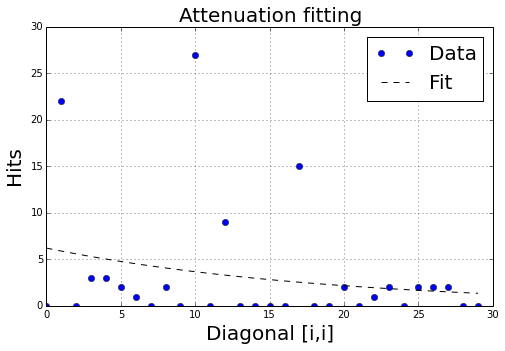

In [17]:
plt.figure(figsize=(8,5))
plt.plot(Pos, diag, 'o')
plt.plot(Pos_fit, Atten, '--k')
plt.xlabel('Diagonal [i,i]', fontsize=20)
plt.ylabel('Hits', fontsize=20)
plt.title('Attenuation fitting', fontsize=20)
plt.legend(["Data","Fit"], loc = 0 , fontsize=20)
#plt.text(180, 650, "$\mu_e=$" + str(round(A*1e9*1e4,2)) + "$e^{0.0021 V_{bias}}$", fontsize=20)
plt.grid()

### 3D plotting

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


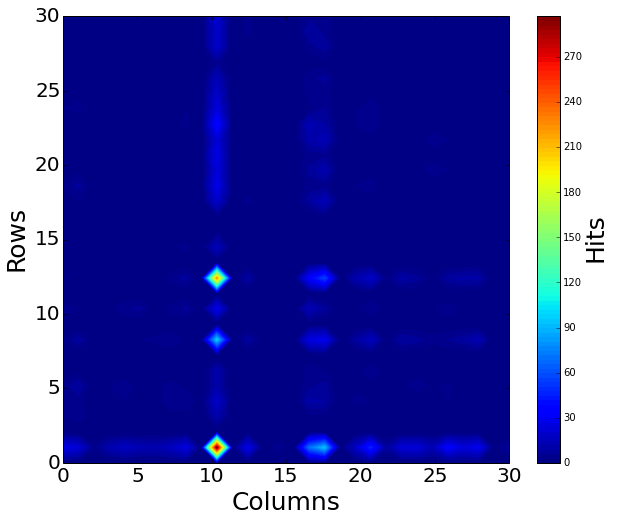

In [18]:
points = 30

boundC = 30 
boundG = 30 
stepC = boundC / points
stepG = boundG / points

axis_x = np.linspace(0,boundC, points)
axis_y = np.linspace(0,boundG, points)

x,y = np.meshgrid(axis_x, axis_y)

plt.figure(figsize=(10,8))
plt.contourf(x, y, matrix, 100)
cbar = plt.colorbar()
plt.xlabel('Columns', fontsize = 25)
plt.ylabel('Rows', fontsize = 25)
cbar.set_label('Hits', fontsize = 25)

# Increase tick labels
plt.tick_params(axis='both', which='major', labelsize=20)

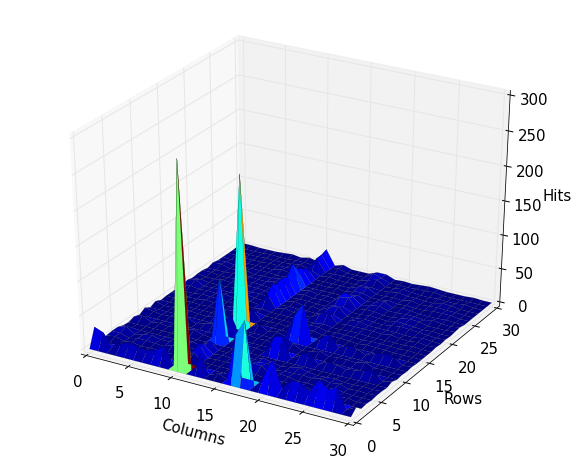

In [19]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')
axis_z = matrix
X, Y = np.meshgrid(axis_x, axis_y)
Z = axis_z.reshape(X.shape)

surf1 = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.1, antialiased=True)
#fig.colorbar(surf1, shrink=0.5, aspect=4, label="Hits")

ax1.set_xlabel('Columns', fontsize = 15)
ax1.set_ylabel('Rows', fontsize = 15)
ax1.set_zlabel('Hits', fontsize = 15)

# Increase tick labels
ax1.tick_params(axis='both', which='major', labelsize=15)
